In [12]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

In [13]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 23:11:46) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=8, micro=1, releaselevel='final', serial=0)


# Homework

## Problem 1

Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

new bound:  0.5
new bound:  0.75
new bound:  0.625
new bound:  0.5625
new bound:  0.59375
new bound:  0.578125
new bound:  0.5703125
new bound:  0.56640625
new bound:  0.568359375
new bound:  0.5673828125
new bound:  0.56689453125
new bound:  0.567138671875
new bound:  0.5672607421875
new bound:  0.56719970703125
new bound:  0.567169189453125
new bound:  0.5671539306640625
new bound:  0.5671463012695312
new bound:  0.5671424865722656
new bound:  0.5671443939208984
new bound:  0.567143440246582


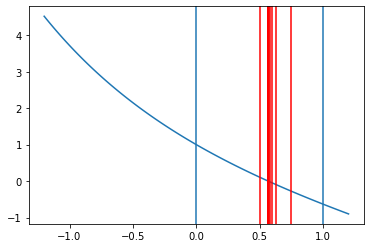

In [14]:
x_cos = np.linspace(-1.2, 1.2, 100)
y_cos = np.exp(-x_cos) - x_cos
plt.plot(x_cos, y_cos)


error = 1.0
bound_l = 0
bound_r = 1

plt.axvline(x=bound_l)
plt.axvline(x=bound_r)


def fun(x):
    return np.exp(-x) - x


while(error > 0.000001):
    #print "error: " , error
    error = error * 0.5
    #print "error: " , error
    new_bound = (bound_l + bound_r) * 0.5
    #print "bound_l: " , bound_l
    #print "bound_r: " , bound_r
    print ("new bound: " , new_bound)
    plt.axvline(x=new_bound, color = "red")
    plt.plot()
    
    if( fun(new_bound)* fun(bound_r) < 0):
        bound_l = new_bound
    else:
        bound_r = new_bound
        
##############ANSWER#############
#You can't pick -1 and 0 because f(-1) and f(0) have the same sign.
#With this circumstances bisection doesn't work

## Problem 2
Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

In [15]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7


2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

local maximums: 
x:  0.19136724472045893 y:  1.3690761972153735e-06
x:  0.6817805290222166 y:  0.0038258083219751132
local minimums: 
x:  0.2970913887023926 y:  -1.214713659837129e-05


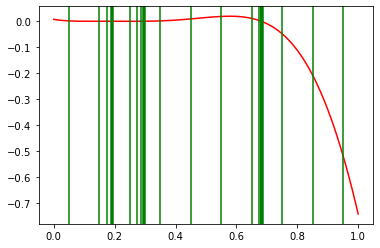

In [16]:
def df(x): #first derivative
    return 0.0072868 - 2*0.0977383*x + 3*0.664685*x**2 - \
    4*2.40773*x**3 + 5*4.46766*x**4 - 6*3.7091*x**5 + 7*x**6
    
def ddf(x): #second derivative
    return -2*0.0977383 + 6*0.664685*x - 12*2.40773*x**2 + 20*4.46766*x**3 - 30*3.7091*x**4 + 42*x**5

x_df = np.linspace(0, 1, 100)
y_df = df(x_df)
plt.plot(x_df, y_df, color="red")

bound_l = 0.0
bound_r = 0.2
x_max = []
x_min = []
ran  = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for i in ran:
    error = 1
    bound_l = i
    bound_r = i+ 0.1
    while(error > 0.000001):
        error = error * 0.5
        new_bound = (bound_l + bound_r) * 0.5
        #print "new bound: " , new_bound
        plt.axvline(x=new_bound, color = "green")
        plt.plot()

        if( df(new_bound)* df(bound_r) < 0):
            bound_l = new_bound
        elif(df(new_bound) * df(bound_l) <0):
            bound_r = new_bound
        else:
            new_bound = None
            break
        
    
    if new_bound not in x_max and new_bound != None:
        x_max.append(new_bound)
        #print "extrempoint: ", new_bound
        
for value in x_max:
    if ddf(value) > 0:
        x_max.remove(value)
        x_min.append(value)
    

print ("local maximums: ")
for value in x_max:
    print ("x: ", value, "y: ", f(value)) 

print ("local minimums: ")
for value in x_min:
    print ("x: ", value, "y: ", f(value))
    
#To find local minimums or maximums, first you have to find the intersection of the first derivation.
#This point you enter in the second derivation. If the result is positive you have found a minimum, if it is negative you have found a maximum

2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

global max:  0.19136724472045893 y:  1.3690761972153735e-06
global min:  1 y:  -0.07515324699999937


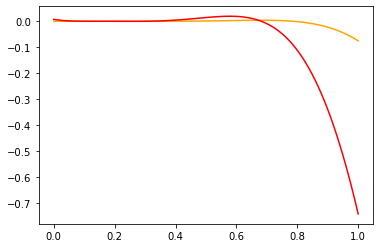

In [17]:
### Just plotting
x_f = np.linspace(0, 1, 100)
y_f = f(x_f)
x_df = np.linspace(0, 1, 100)
y_df = df(x_df)
x_ddf = np.linspace(0, 1, 100)
y_ddf = ddf(x_ddf)

plt.plot(x_f, y_f, color="orange")
plt.plot(x_df, y_df, color="red")
#plt.plot(x_ddf, y_ddf, color="blue")

g_max = f(0)
g_min = f(0)

for value in x_max:
    if f(value) > g_max:
        g_max = value

if f(1) > g_max:
        g_max = 1
        
        
for value in x_min:
    if f(value) < g_min:
        g_min = value

if f(1) < g_min:
        g_min = 1
        
print ("global max: ", g_max, "y: ", f(g_max))
print ("global min: ", g_min, "y: ", f(g_min))        


## Problem 3
In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


-0.6000000000000001
-0.7000000000000001
-0.6500000000000001
-0.6250000000000001
-0.6125
-0.6062500000000001
-0.6031250000000001
-0.6046875
-0.6039062500000001
-0.6035156250000001
-0.6037109375
-0.6038085937500001
-0.6038574218750001
-0.6038818359375001


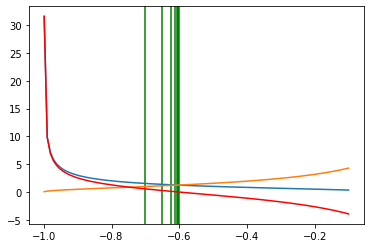

In [18]:
def f(x):
    return math.sqrt(-x/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x + 1)))

def fg(x):
    return f(x) - g(x)

error = 1.0
bound_l = -0.8
bound_r = -0.4

while(error > 0.0001):
    error = error / 2
    new_bound = (bound_l + bound_r) / 2
    print(new_bound)
    plt.axvline(x=new_bound, color = "green")
    plt.plot()
    
    if( fg(new_bound)* fg(bound_r) < 0):
        bound_l = new_bound
    else:
        bound_r = new_bound



xs = np.linspace(-0.999,-0.1, 100)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]
fgx = [fg(x) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,gx)
plt.plot(xs,fgx, color = "red")

## Problem 4
Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple this is an excellent approximatoin.

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

In [19]:
import math
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
#bad_poisson(200,200) # uncomment to see it breaks

print("Answer: the type float isn't capable to hold such big numbers, because the result of factorial is too big" )

Answer: the type float isn't capable to hold such big numbers, because the result of factorial is too big


4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$



### Proof:
Using the logarithm rules we get:
$$
\ln(P(k; \lambda)) = \ln(\frac{\lambda^k \exp(-\lambda)}{k!}) = \ln(\lambda^k \exp(-\lambda)) - \ln(k!)
    = \ln(\lambda^k) + \ln(\exp(-\lambda)) - \ln(k!) = k*\ln(\lambda) - \lambda - ln(k!)
$$
q.e.d.

4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(5) == math.log(math.factorial(4))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \mu=1000) \approx 0.0126146$

In [20]:
def good_poisson(lmd, k):
    return np.exp((k*math.log(lmd)-lmd)-math.lgamma(k+1))
good_poisson(1000,1000)

0.012614611348719664

4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out). 

And No, summing up to infinity is not practical.

In [32]:
print("Answer")
print("We get the propability for P('1000 or more apples') by subtracting P('999 or fewer apples') from 1.")

def poisson_percentage(lmd):
    totalPercent= 0
    for p in range (999):
        totalPercent += good_poisson(lmd,p) #chance Ply sells less then 1000 apples
    return 1-totalPercent
print("The chance that Ply sells all his apples is : ", poisson_percentage(987.6)*100 , "%")

Answer
We get the propability for P('1000 or more apples') by subtracting P('999 or fewer apples') from 1.
The chance that Ply sells all his apples is :  36.260488004681335 %


4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

lambda:  982.2265625


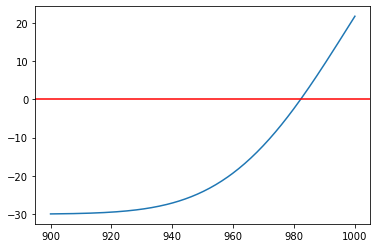

In [33]:
xs=np.linspace(900,1000,200)
def find_lambda(lmd):
    totalPercent= 0
    for i in range (0,999):
        totalPercent += good_poisson(lmd,i) #chance Ply sells less then 1000 apples
    
    return ((1-totalPercent)-0.3)*100

#print(xs)
arr = [find_lambda(i) for i in xs]

plt.plot(xs,arr)
plt.axhline(color='red')

def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)

lamb = bisection(find_lambda, 800, 1200, 0.1)
print("lambda: " , lamb)

4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).

In [23]:
def ex_profit(lmd):
    profit=0
    for i in range(1000):
        profit += good_poisson(lmd,i)*(i*30 - (1000-i)*20) #chance of occuring*value of the event, add all of them up
    return profit
print("Ply's profit' ", ex_profit(lamb), "baht")


Ply's profit'  20153.262712307518 baht


4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

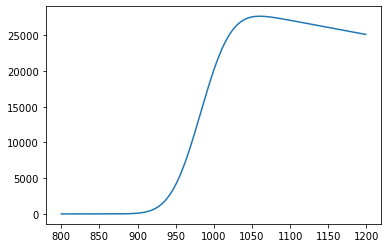

In [24]:
def ex_profit_func(num_apples,lmd):
    profit=0
    for i in range(num_apples):
        profit += good_poisson(lmd,i)*(i*30 - (num_apples-i)*20) #chance of occuring*value of the event, add all of them up
    return profit

arr=[ex_profit_func(k,lamb) for k in range(800,1200)]
xs=[k for k in range(800,1200)]
plt.plot(xs,arr)

## Problem 5

Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

Text(0, 0.3, 'FWHM')

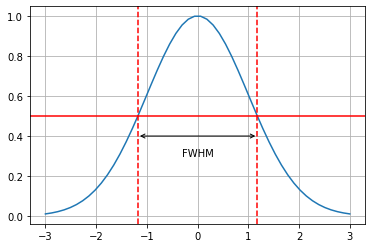

In [25]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

5.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

FWHM:  6.200555711984634


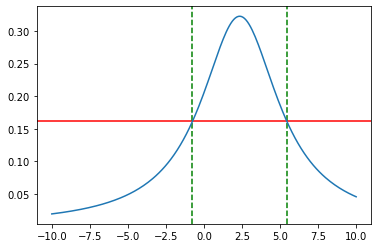

In [26]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)

def df(x, gamma=3.1):
    mu = 2.345
    return -(2*gamma*(x-mu))/((x-mu)**2+gamma**2)**2

error = 1.0
bound_l = 0.0
bound_r = 5.0

while(error > 0.0001):
    error = error * 0.5
    new_bound = (bound_l + bound_r) * 0.5
    #print(new_bound)
    #plt.axvline(x=new_bound, color = "green")
    #plt.plot()
    
    if( df(new_bound)* df(bound_r) < 0):
        bound_l = new_bound
    else:
        bound_r = new_bound

f_max = f(new_bound)
#print "new_bound: ", new_bound
#print "f_max: ", f_max

plt.axhline(f_max*0.5, color='red')

def ff(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2) - f_max*0.5

bounds = [[-10, new_bound], [new_bound, 10]]
FWHM = 0

for b in bounds:
    bound_l = b[0]
    bound_r = b[1]
    error = 1
        
    while(error > 0.0001):
        error = error *0.5
        new_bound = (bound_l + bound_r) * 0.5    
        if( ff(new_bound)* ff(bound_r) < 0):
            bound_l = new_bound
        else:
            bound_r = new_bound
            
    plt.axvline(new_bound, color='green', linestyle='dashed')
    FWHM = FWHM + abs(new_bound)
    

x = np.linspace(-10,10,200)
y = [f(xx) for xx in x]
y5 = [ff(xx) for xx in x]
#dy = [df(dx) for dx in x]
plt.plot(x,y)
#plt.plot(x,y5)
#plt.plot(x,dy)

print ("FWHM: ", FWHM)

5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

0.1081651140465921
6.200049850158393


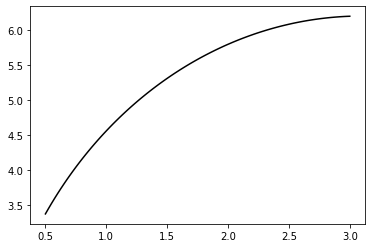

In [27]:
print(f(1.0, gamma=0.2)) # you may find this useful

#####


def f(x, gamma=3.1):
        mu = 2.345
        return gamma/((x-mu)**2+gamma**2)

def df(x, gamma=3.1):
    mu = 2.345
    return -(2*gamma*(x-mu))/((x-mu)**2+gamma**2)**2


    
def FWHM(gamma):

    #finding maximum of f
    error = 1.0
    bound_l = -10
    bound_r = 10

    while(error > 0.00001):
        error = error * 0.5
        new_bound = (bound_l + bound_r) * 0.5
        if( df(new_bound, gamma)* df(bound_r, gamma) < 0):
            bound_l = new_bound
        else:
            bound_r = new_bound

    f_max = f(new_bound)
    mul = 0.5
    
    def ff(x, gamma=3.1):
        mu = 2.345
        return gamma/((x-mu)**2+gamma**2) - f_max*mul
    #plt.axhline(f_max*mul, color='red')
    
    #Finding FWHM
    bounds = [[-10, new_bound], [new_bound, 10]]
    FWHM = []

    for b in bounds:
        bound_l = b[0]
        bound_r = b[1]
        error = 1

        while(error > 0.00001):
            error = error *0.5
            new_bound = (bound_l + bound_r) * 0.5    
            if( ff(new_bound, gamma)* ff(bound_r, gamma) < 0):
                bound_l = new_bound
            else:
                bound_r = new_bound

        #plt.axvline(new_bound, color='green', linestyle='dashed')
        FWHM.append(new_bound)
    

    return abs(FWHM[0] - FWHM[1])
        
x = np.linspace(0.5, 3,100)
y = [FWHM(xx) for xx in x]
plt.plot(x,y, color ="black")
a = np.linspace(-10,10,200)
b = [f(xx) for xx in a]
#plt.plot(a, b, color="green")
print(FWHM(3.1))

0.1081651140465921


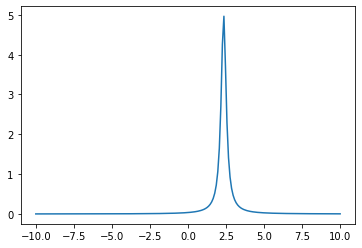

In [28]:
print(f(1.0, gamma=0.2)) # you may find this useful
x = np.linspace(-10,10,200)
y = [f(xx, 0.2) for xx in x]
plt.plot(x,y)

5.3) (Optional) Prove the relation you found in 5.2)